In [1]:
# system ----
import os
import sys
import h5py
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
 
# !!! you will have to edit this to your local computer

# local ----
localPath = os.path.expanduser("~/")
projPath = os.path.expanduser(f"{localPath}Desktop/work/jpl/analysis")
sys.path.append(projPath+"/modules")
import plot_parameters 

# !!! 

In [2]:
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.legend_handler import HandlerBase

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")

In [3]:
# import time domain (light curve) data
dataPath = f"{localPath}Desktop/work/jpl/lens_data"

# Show unprocessed file contents
df = pd.read_csv(f"{dataPath}/RXJ1131_Millon2020.csv", index_col=0) 
print(f"Number of (rows, columns): {df.shape}")
df

Number of (rows, columns): (922, 9)


,mag_A,magerr_A,mag_B,magerr_B,mag_C,magerr_C,mag_D,magerr_D,telescope
mhjd,,,,,,,,,
52988.31255,-12.83561,0.00710,-12.89500,0.00777,-11.78404,0.00933,-10.43047,0.03145,SMARTSandicam
52995.30600,-12.80570,0.00473,-12.86418,0.00466,-11.76767,0.00723,-10.42736,0.02184,SMARTSandicam
53002.32091,-12.79833,0.00705,-12.83406,0.00379,-11.73317,0.00932,-10.45533,0.01647,SMARTSandicam
53013.32044,-12.77932,0.00483,-12.75148,0.00489,-11.68157,0.01482,-10.29250,0.04443,SMARTSandicam
53021.29184,-12.75228,0.00581,-12.75571,0.00581,-11.74885,0.02114,-10.43770,0.02205,SMARTSandicam
...,...,...,...,...,...,...,...,...,...
58298.01686,-12.75301,0.00586,-11.91142,0.00615,-10.95274,0.03222,-9.25584,0.11940,EulerCAM
58310.99133,-13.06515,0.00639,-12.09823,0.03000,-11.16013,0.02996,-9.29282,0.02964,EulerCAM
58313.98144,-13.09377,0.00288,-12.14034,0.00719,-11.22022,0.00581,-9.37810,0.02384,EulerCAM


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 922 entries, 52988.31255 to 58320.9673
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mag_A      922 non-null    float64
 1   magerr_A   922 non-null    float64
 2   mag_B      922 non-null    float64
 3   magerr_B   922 non-null    float64
 4   mag_C      922 non-null    float64
 5   magerr_C   922 non-null    float64
 6   mag_D      922 non-null    float64
 7   magerr_D   922 non-null    float64
 8   telescope  922 non-null    object 
dtypes: float64(8), object(1)
memory usage: 72.0+ KB


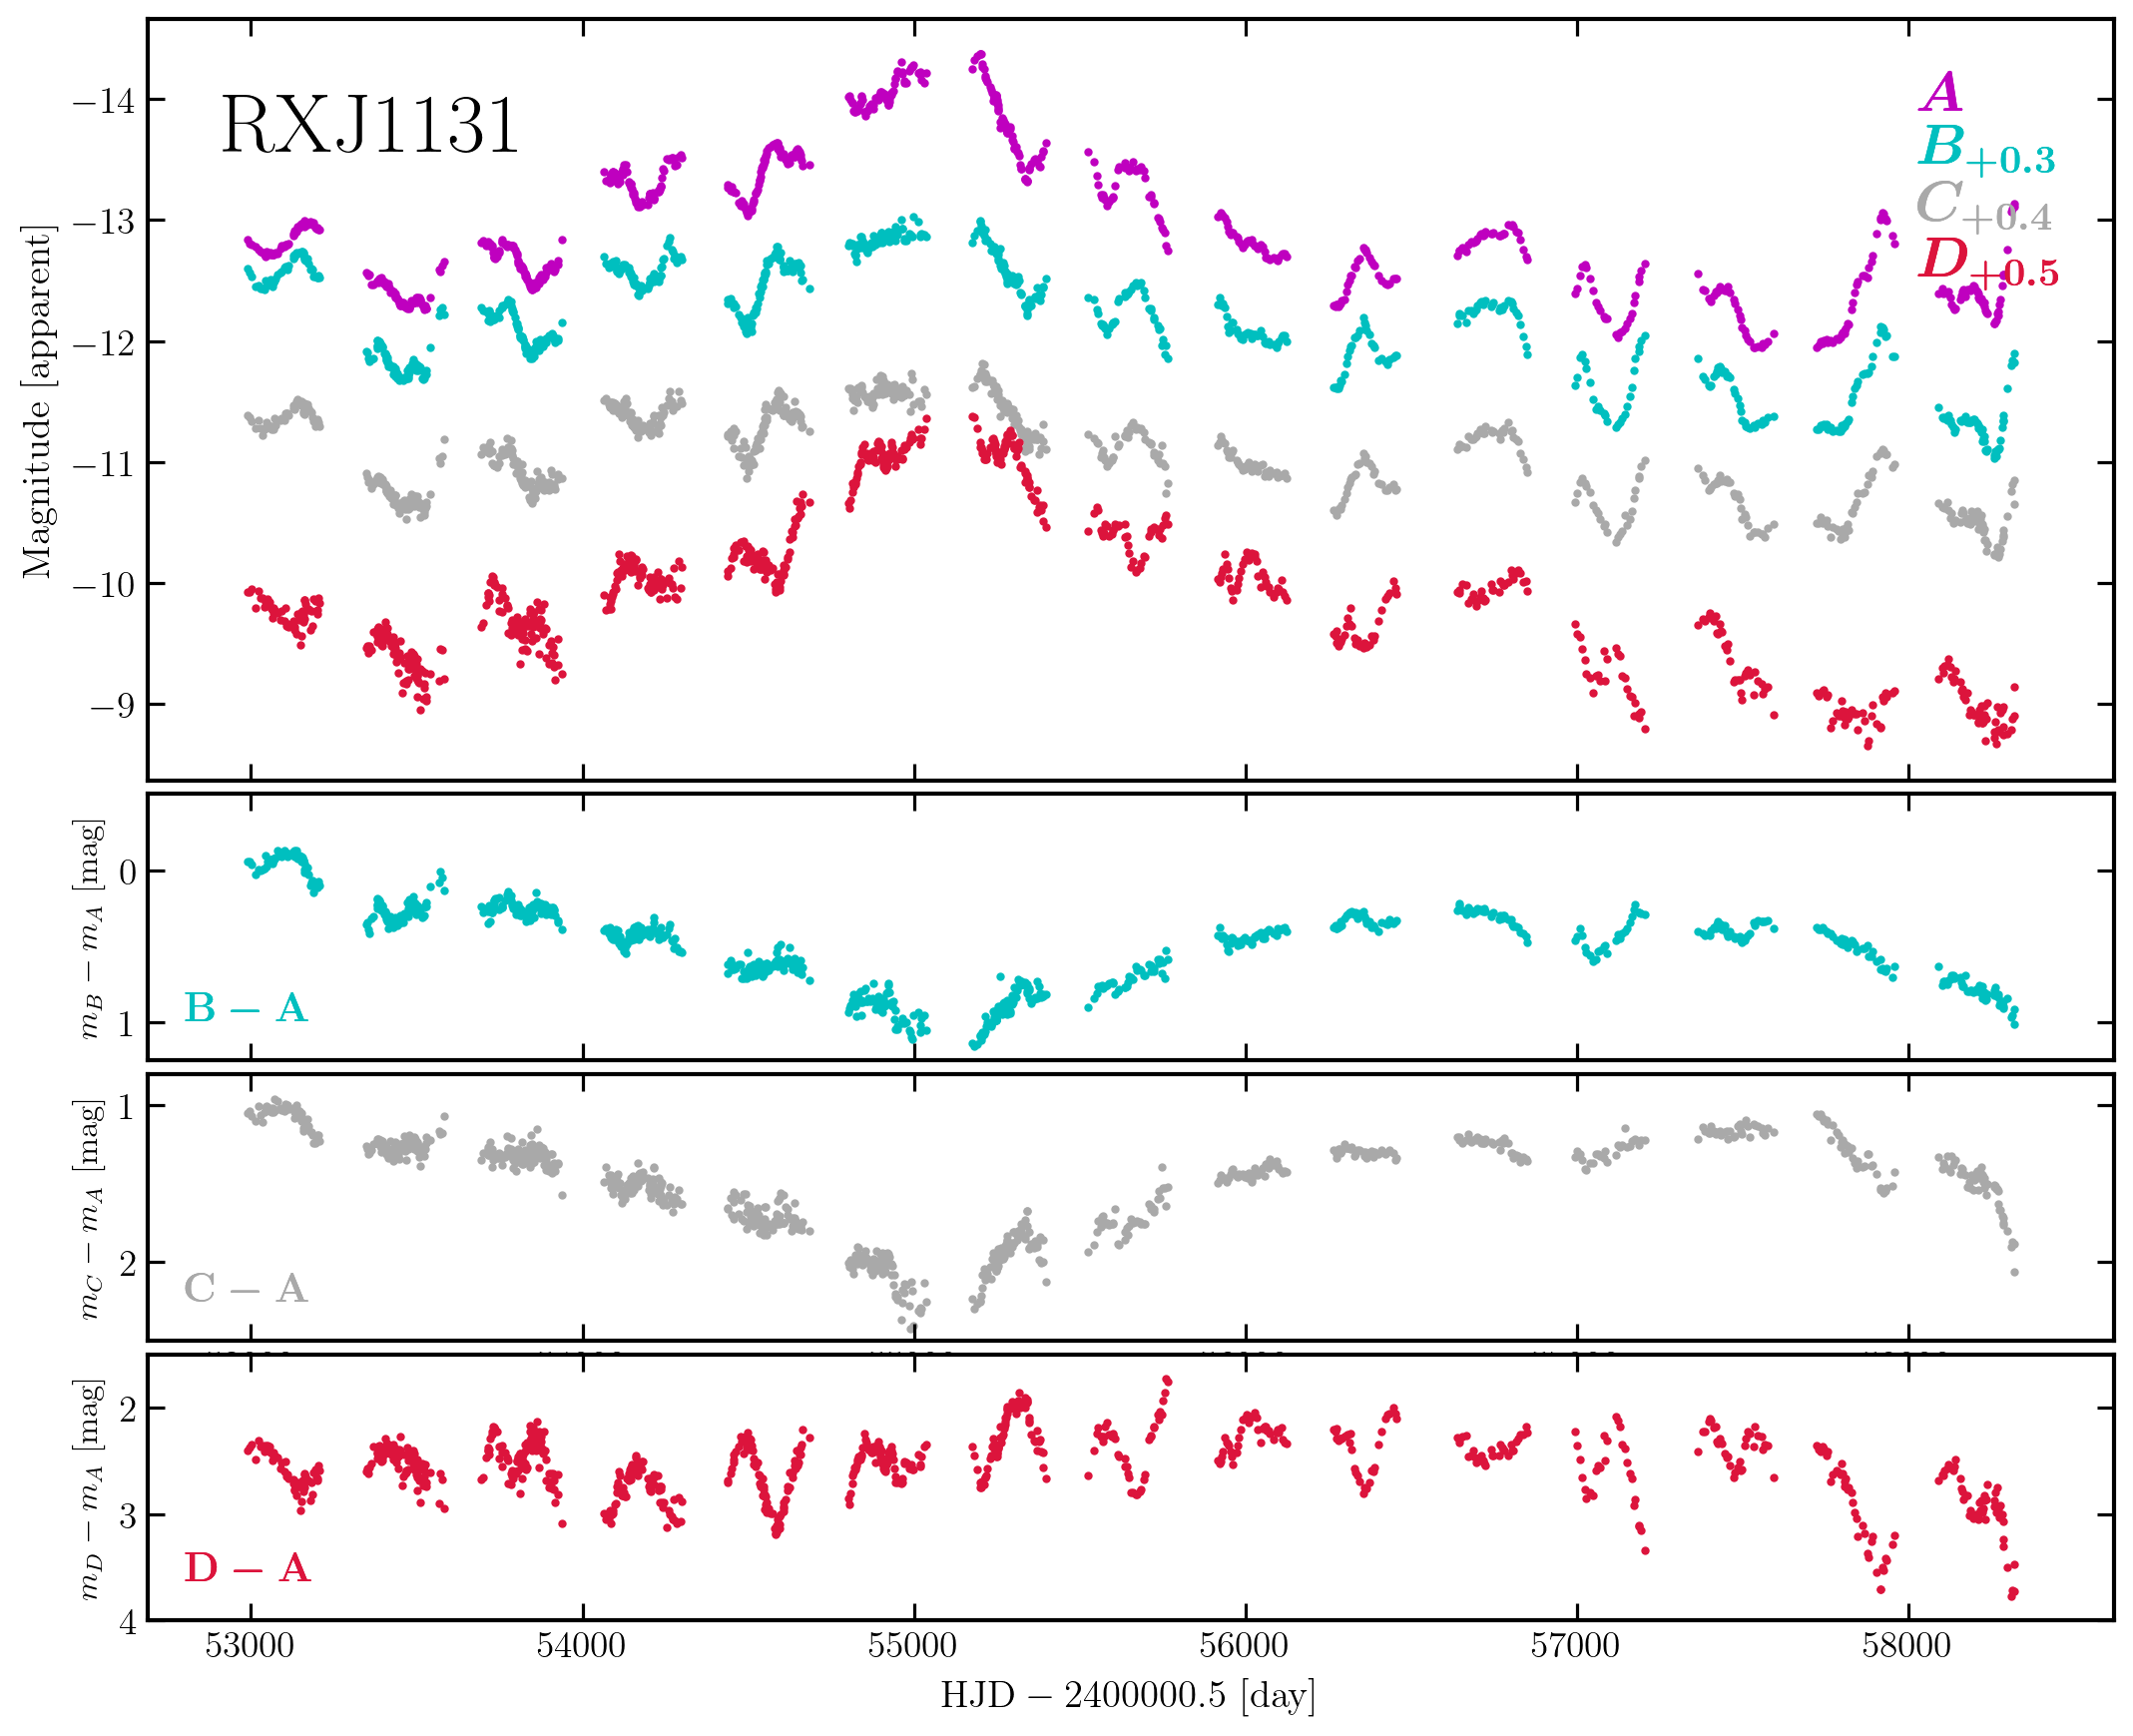

In [5]:
# Initialize figure
fig, axs = plt.subplots(figsize=(15.25/1.2, 12.75/1.2), 
                        nrows=4, ncols=1, gridspec_kw={'height_ratios': [1, 0.35, 0.35, 0.35]},
                        dpi=100)

plt.subplots_adjust(wspace=0.1, hspace=0.035)

for ax in axs.flatten():
    ax.xaxis.set_tick_params(direction='in', which='both'); ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_ticks_position('both'); ax.yaxis.set_ticks_position('both')
    ax.set_xscale('linear'); ax.set_yscale('linear');
    ax.set_xlim(df.index[0]-300, df.index[-1]+300)
    ax.invert_yaxis()

color1 = 'm'
color2 = 'c'
color3 = 'darkgray'
color4 = 'crimson'

from matplotlib.patches import Rectangle
empty = Rectangle((0,0), 0, 0, alpha=0.0)
    
# ------------------------------------------------------------------------------

def rel_int(rel_mag):
    return np.power(2.512, rel_mag)

def rel_mag(rel_int):
    return 2.5 * np.log10(rel_int)

# ------------------------------------------------------------------------------

axs[0].set_ylabel(r'$\rm Magnitude\ [apparent]$')

axs[0].scatter(df.index, df.mag_A, c=color1)
axs[0].scatter(df.index, df.mag_B+0.3, c=color2)
axs[0].scatter(df.index, df.mag_C+0.4, c=color3)
axs[0].scatter(df.index, df.mag_D+0.5, c=color4)

sim_leg = axs[0].legend([empty]*7,
                [r'$\rm RXJ1131$'],
               loc="upper left",frameon=False,ncol=1,
               fontsize=30.,handlelength=0,handletextpad=0,labelspacing=0.05)
sim_leg.get_texts()[0].set_color('k')
axs[0].add_artist(sim_leg)

sim_leg = axs[0].legend([empty]*7,
                [r'\boldmath$A$', r'\boldmath$B_{+0.3}$', r'\boldmath$C_{+0.4}$', r'\boldmath$D_{+0.5}$'],
               loc="upper right",frameon=False,ncol=1,
               fontsize=20.5,handlelength=0,handletextpad=0,labelspacing=0.05)
sim_leg.get_texts()[0].set_color(color1)
sim_leg.get_texts()[1].set_color(color2)
sim_leg.get_texts()[2].set_color(color3)
sim_leg.get_texts()[3].set_color(color4)
axs[0].add_artist(sim_leg)

# ------------------------------------------------------------------------------

axs[1].set_ylabel(r'$m_{B} - m_{A}\ [\rm mag]$', fontsize=12.0)
axs[1].set_ylim(1.25, -0.5)

axs[1].scatter(df.index, df.mag_B-df.mag_A, c=color2)

sim_leg = axs[1].legend([empty]*7,
                [r'\boldmath$\rm B-A$'],
               loc="lower left",frameon=False,ncol=1,
               fontsize=15.,handlelength=0,handletextpad=0,labelspacing=0.05)
sim_leg.get_texts()[0].set_color(color2)
axs[1].add_artist(sim_leg)

# ------------------------------------------------------------------------------

axs[2].set_ylabel(r'$m_{C} - m_{A}\ [\rm mag]$', fontsize=12.0)
axs[2].set_ylim(2.5, 0.8)

axs[2].scatter(df.index, df.mag_C-df.mag_A, c=color3)

sim_leg = axs[2].legend([empty]*7,
                [r'\boldmath$\rm C-A$'],
               loc="lower left",frameon=False,ncol=1,
               fontsize=15.,handlelength=0,handletextpad=0,labelspacing=0.05)
sim_leg.get_texts()[0].set_color(color3)
axs[2].add_artist(sim_leg)

# ------------------------------------------------------------------------------

axs[3].set_xlabel(r'$\rm HJD - 2400000.5\ [day]$'); 
axs[3].set_ylabel(r'$m_{D} - m_{A}\ [\rm mag]$', fontsize=12.0)
axs[3].set_ylim(4.0, 1.5)

axs[3].scatter(df.index, df.mag_D-df.mag_A, c=color4)

sim_leg = axs[3].legend([empty]*7,
                [r'\boldmath$\rm D-A$'],
               loc="lower left",frameon=False,ncol=1,
               fontsize=15.,handlelength=0,handletextpad=0,labelspacing=0.05)
sim_leg.get_texts()[0].set_color(color4)
axs[3].add_artist(sim_leg)


plt.show()

In [6]:
class base_analysis(object):
    """Just a class to contain the base analysis attributes"""
    
    # ------------------------------------------------------------------------------------------
    
    def load_df(self, index_w_time: bool = True) -> None:
        # import time domain (light curve) data
        dataPath = f"{localPath}Desktop/work/jpl/lens_data"
        dataFile = f"{dataPath}/RXJ1131_Millon2020.csv"

        # Show unprocessed file contents
        if index_w_time:
            df = pd.read_csv(dataFile, index_col=0)
        else:
            df = pd.read_csv(dataFile)
        return df
    
    # ------------------------------------------------------------------------------------------

    def plot(self, obj: str = 'A') -> None:
        df = self.load_df()
        
        # Initialize figure
        fig, ax = plt.subplots(figsize=(15.25/1.2, 6.75/1.2), 
                                nrows=1, ncols=1, dpi=100)

        plt.subplots_adjust(wspace=0.1, hspace=0.035)
        ax.xaxis.set_tick_params(direction='in', which='both'); ax.yaxis.set_tick_params(direction='in', which='both')
        ax.xaxis.set_ticks_position('both'); ax.yaxis.set_ticks_position('both')
        ax.set_xscale('linear'); ax.set_yscale('linear');
        ax.set_xlim(df.index[0]-300, df.index[-1]+300)
        ax.invert_yaxis()
        
        # define matplotlib colors
        
        # plot scatter data
        if obj == "A":
            ax.scatter(df.index, df.mag_A, c='k')
        elif obj == "B":
            ax.scatter(df.index, df.mag_B, c='k')
        elif obj == "C":
            ax.scatter(df.index, df.mag_C, c='k')
        elif obj == "D":
            ax.scatter(df.index, df.mag_D, c='k')
        else:
            raise Exception("object is is either `A`, `B`, `C`, or `D`")
            
        from matplotlib.patches import Rectangle
        empty = Rectangle((0,0), 0, 0, alpha=0.0)
        sim_leg = ax.legend([empty]*7,
                        [rf'\boldmath$Object\ {obj}$'],
                       loc="upper right",frameon=False,ncol=1,
                       fontsize=20.5,handlelength=0,handletextpad=0,labelspacing=0.05)
        sim_leg.get_texts()[0].set_color('k')
        ax.add_artist(sim_leg)


        # plot labels
        ax.set_xlabel(r'$\rm HJD - 2400000.5\ [day]$'); 
        ax.set_ylabel(r'$\rm Magnitude\ [apparent]$')

        # plot legend: image name
        sim_leg = ax.legend([empty]*7,
                        [r'$\rm RXJ1131$'],
                       loc="upper left",frameon=False,ncol=1,
                       fontsize=30.,handlelength=0,handletextpad=0,labelspacing=0.05)
        sim_leg.get_texts()[0].set_color('k')
        ax.add_artist(sim_leg)


        return fig, ax
    
    # ------------------------------------------------------------------------------------------

    def plot_all(self) -> None:
        df = self.load_df()
        
        # Initialize figure
        fig, ax = plt.subplots(figsize=(15.25/1.2, 6.75/1.2), 
                                nrows=1, ncols=1, dpi=100)

        plt.subplots_adjust(wspace=0.1, hspace=0.035)

        ax.xaxis.set_tick_params(direction='in', which='both'); ax.yaxis.set_tick_params(direction='in', which='both')
        ax.xaxis.set_ticks_position('both'); ax.yaxis.set_ticks_position('both')
        ax.set_xscale('linear'); ax.set_yscale('linear');
        ax.set_xlim(df.index[0]-300, df.index[-1]+300)
        ax.invert_yaxis()

        color1 = 'm'
        color2 = 'c'
        color3 = 'darkgray'
        color4 = 'crimson'

        from matplotlib.patches import Rectangle
        empty = Rectangle((0,0), 0, 0, alpha=0.0)

        ax.set_xlabel(r'$\rm HJD - 2400000.5\ [day]$'); 
        ax.set_ylabel(r'$\rm Magnitude\ [apparent]$')

        ax.scatter(df.index, df.mag_A, c=color1)
        ax.scatter(df.index, df.mag_B+0.3, c=color2)
        ax.scatter(df.index, df.mag_C+0.4, c=color3)
        ax.scatter(df.index, df.mag_D+0.5, c=color4)

        sim_leg = ax.legend([empty]*7,
                        [r'$\rm RXJ1131$'],
                       loc="upper left",frameon=False,ncol=1,
                       fontsize=30.,handlelength=0,handletextpad=0,labelspacing=0.05)
        sim_leg.get_texts()[0].set_color('k')
        ax.add_artist(sim_leg)

        sim_leg = ax.legend([empty]*7,
                        [r'\boldmath$A$', r'\boldmath$B_{+0.3}$', r'\boldmath$C_{+0.4}$', r'\boldmath$D_{+0.5}$'],
                       loc="upper right",frameon=False,ncol=1,
                       fontsize=20.5,handlelength=0,handletextpad=0,labelspacing=0.05)
        sim_leg.get_texts()[0].set_color(color1)
        sim_leg.get_texts()[1].set_color(color2)
        sim_leg.get_texts()[2].set_color(color3)
        sim_leg.get_texts()[3].set_color(color4)
        ax.add_artist(sim_leg)

        plt.show()

        return fig, ax
        

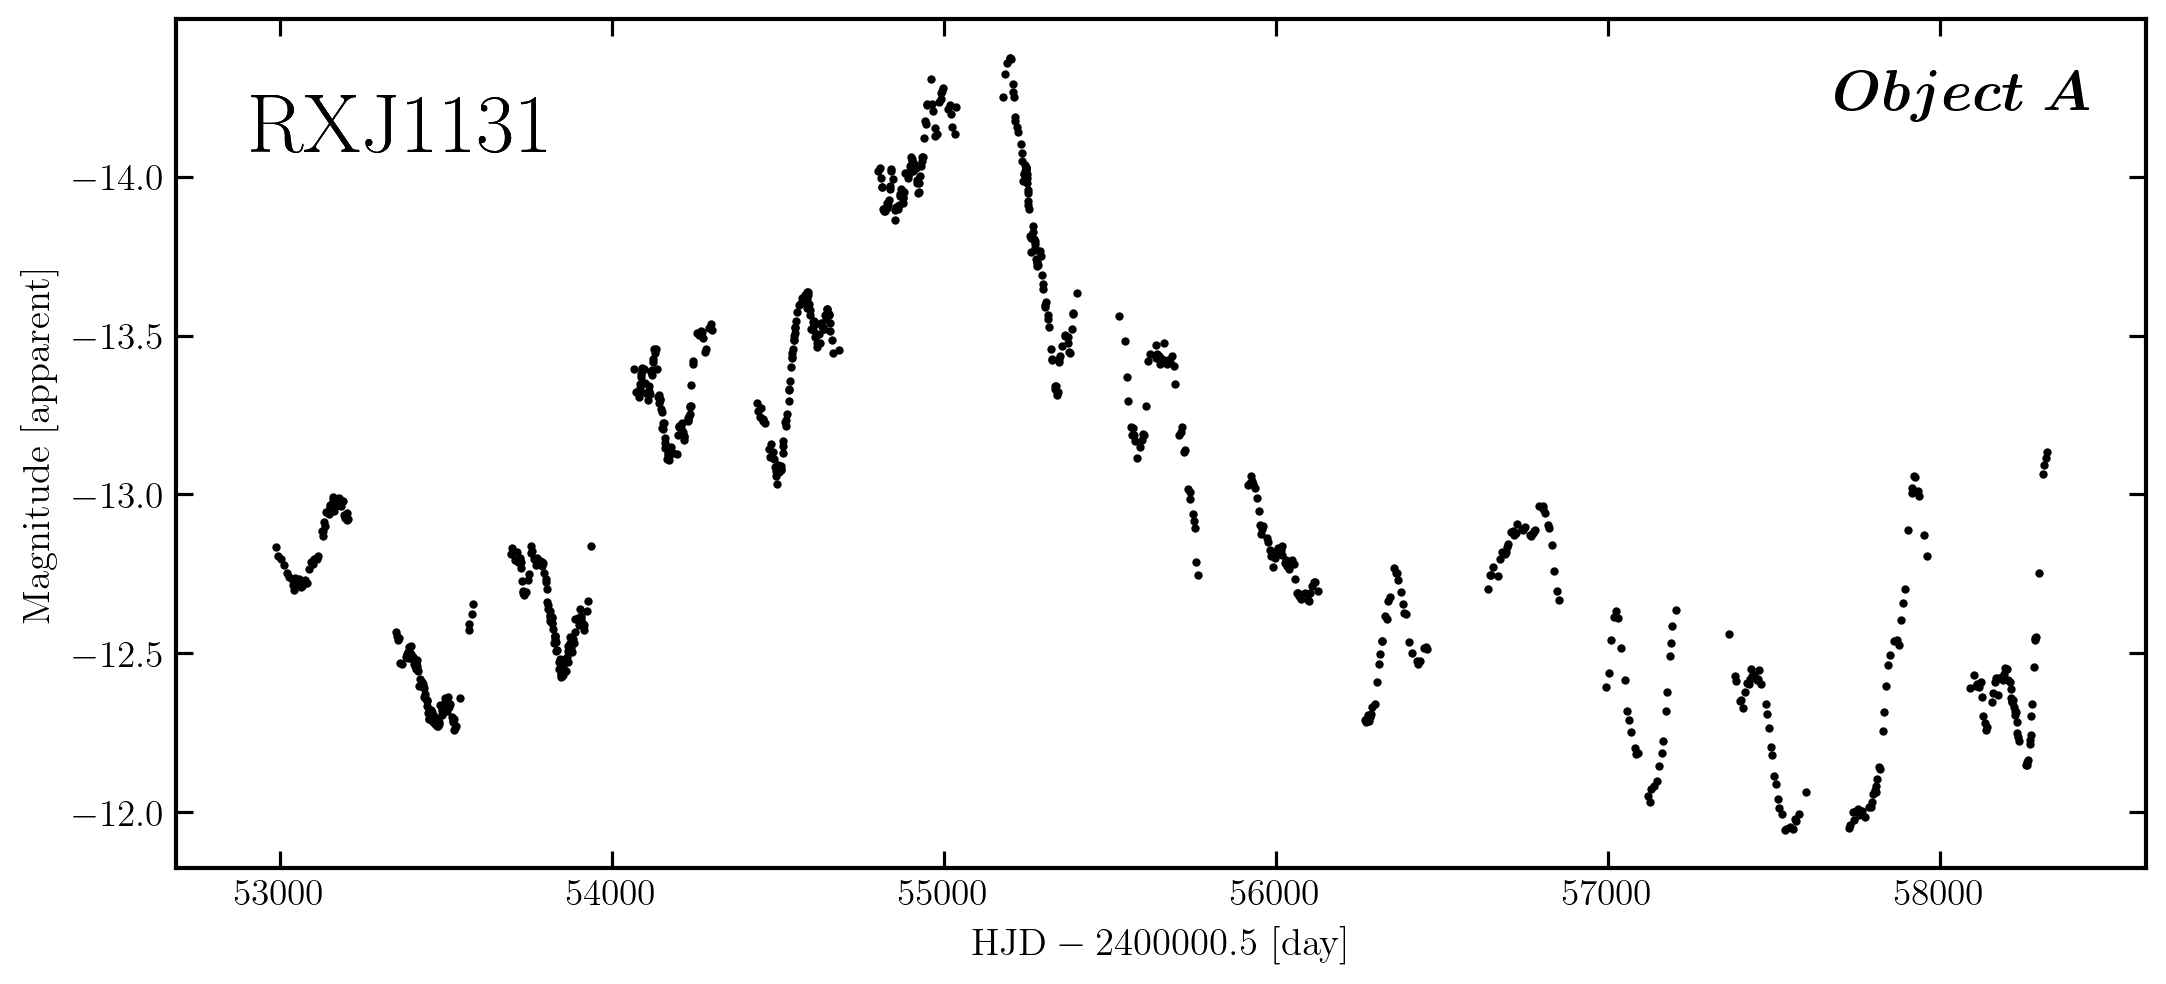

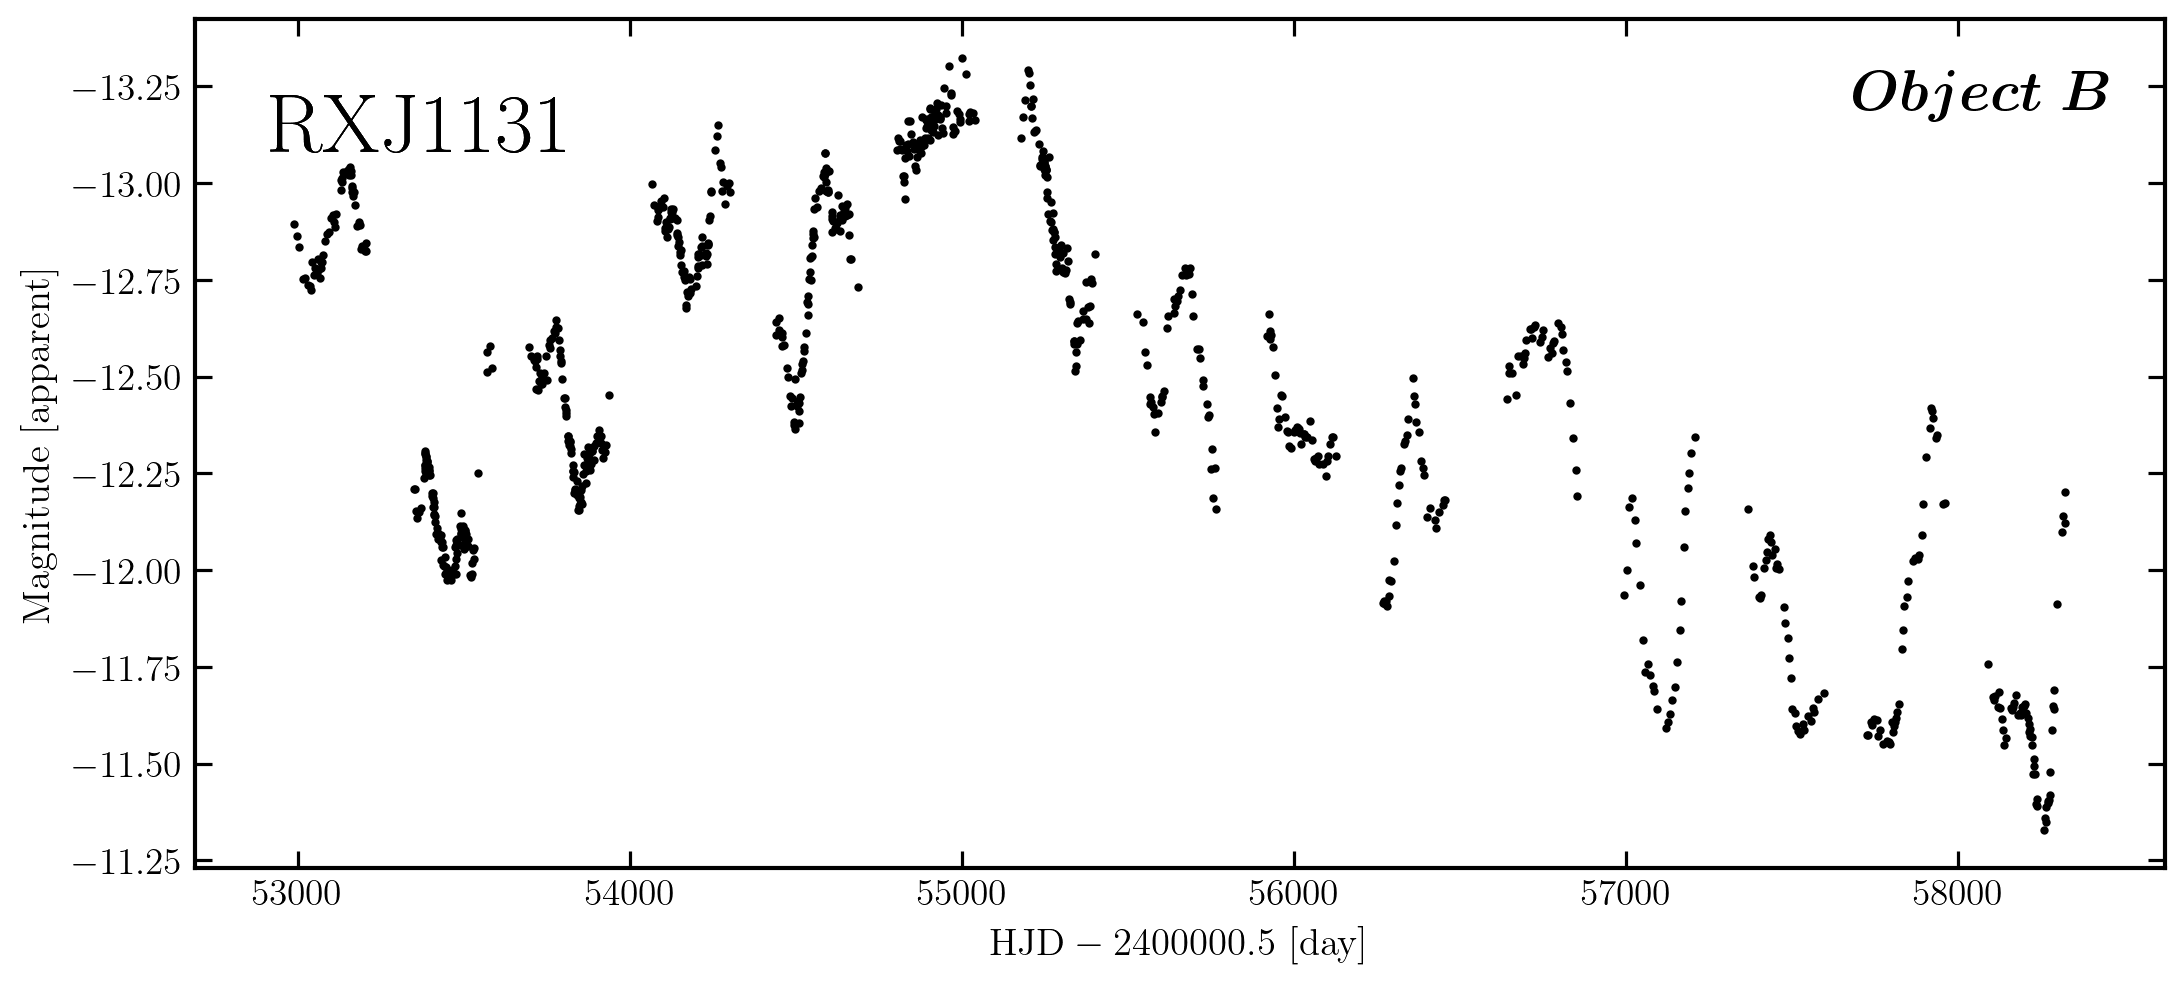

In [7]:
base_analysis().plot(obj='A');
base_analysis().plot(obj='B');

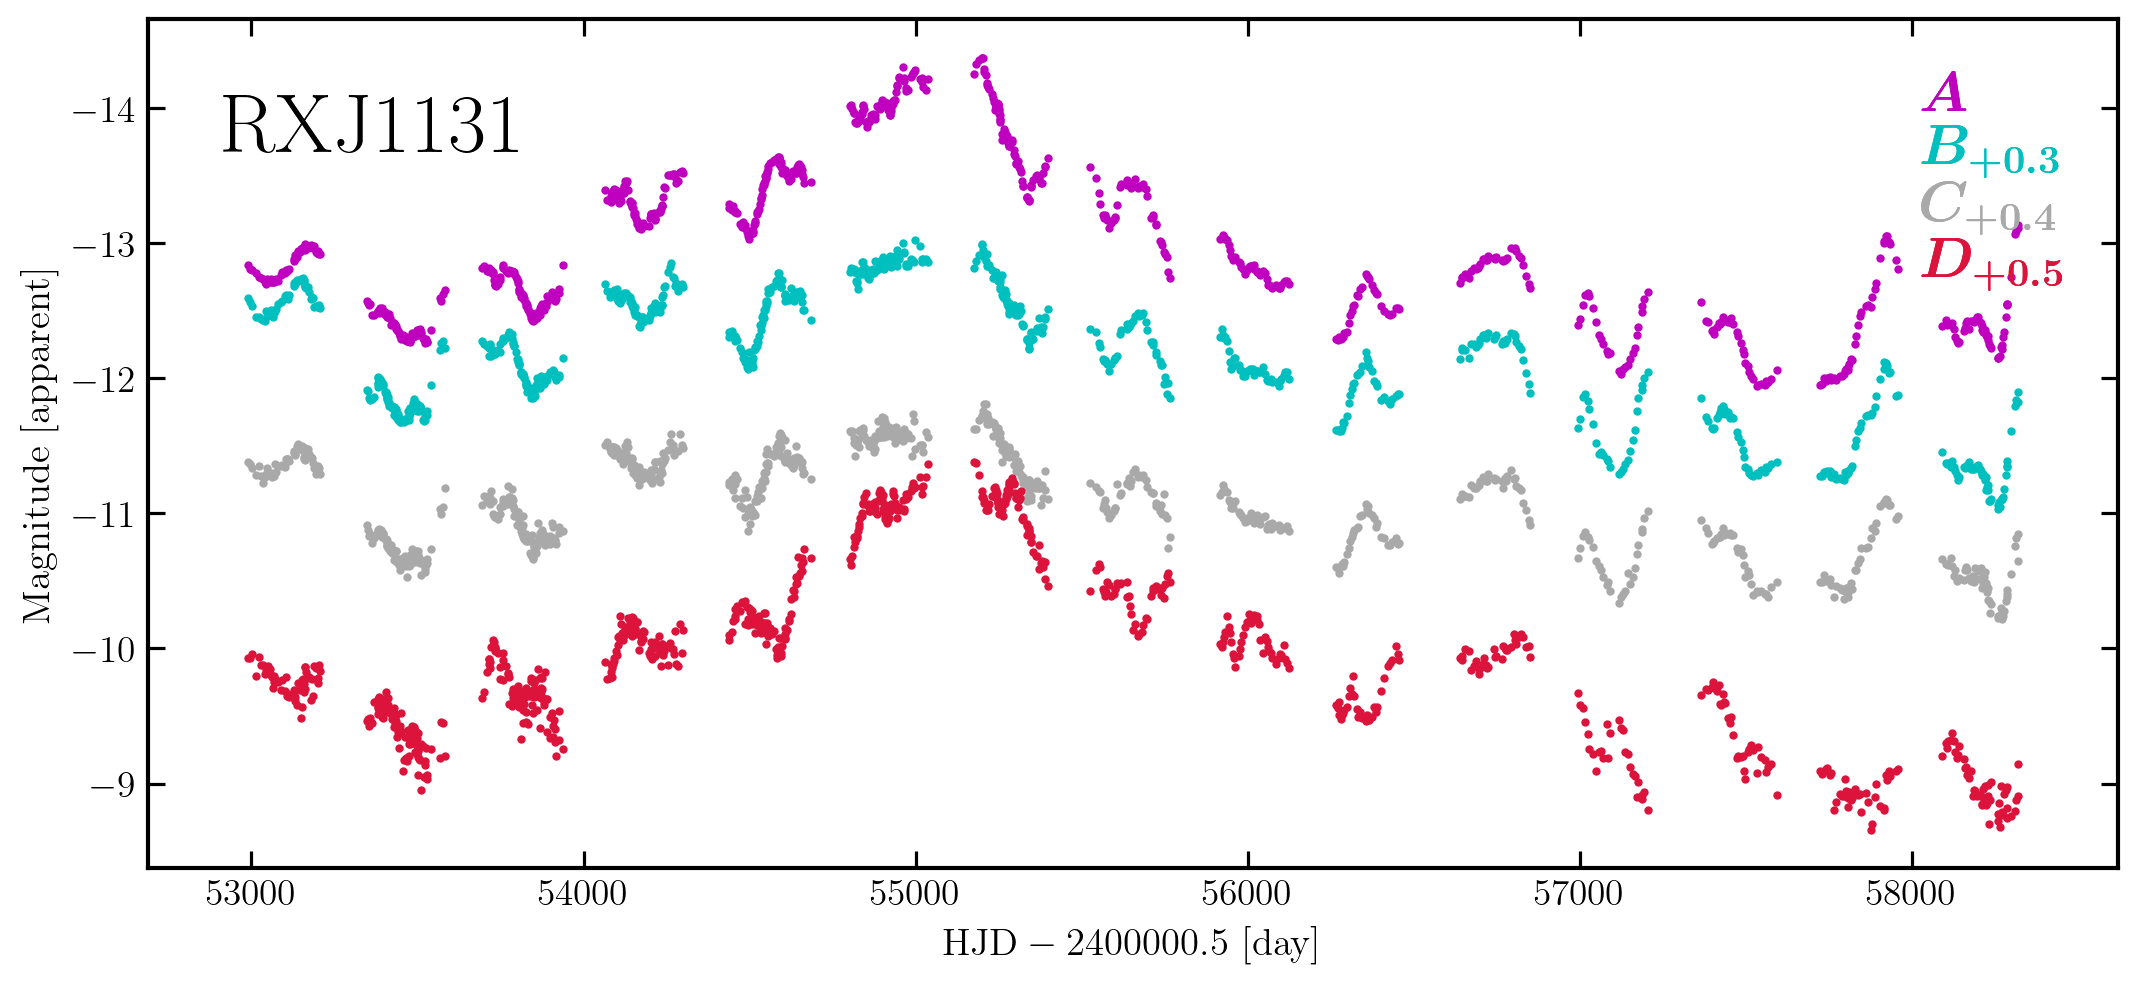

In [8]:
base_analysis().plot_all();

In [9]:
class applied_analysis(base_analysis):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def time_array(self, nbins: int = 500) -> float:
        df = self.load_df()
        return np.linspace(df.index[0], df.index[-1], nbins)
        
    def UnivariateSpline(self, x_data: float = None, y_data: float = None, apply_all: bool = True, 
                               w: float = None, bbox: float = [None, None], 
                               k: int = 3, s: float = None, ext: int = 0, check_finite: bool = False,
                               *args, **kwargs) -> float:
        results = dict()
        
        df = self.load_df()
        
        # by default apply the univariate spline fit to a given x and y array,
        # else can apply to all magnitude date
        from scipy.interpolate import UnivariateSpline
        
        if apply_all:
            results['A'] = UnivariateSpline(df.index[:], df.mag_A[:], s=s, k=k, *args, **kwargs)
            results['B'] = UnivariateSpline(df.index[:], df.mag_B[:], s=s, k=k, *args, **kwargs)  
            results['C'] = UnivariateSpline(df.index[:], df.mag_C[:], s=s, k=k, *args, **kwargs)  
            results['D'] = UnivariateSpline(df.index[:], df.mag_D[:], s=s, k=k, *args, **kwargs)  
        else:
            results['spline'] = UnivariateSpline(x_data, y_data, *args, **kwargs)
        return results

### Set constant smoothing function but vary degree of smoothing spline by integers

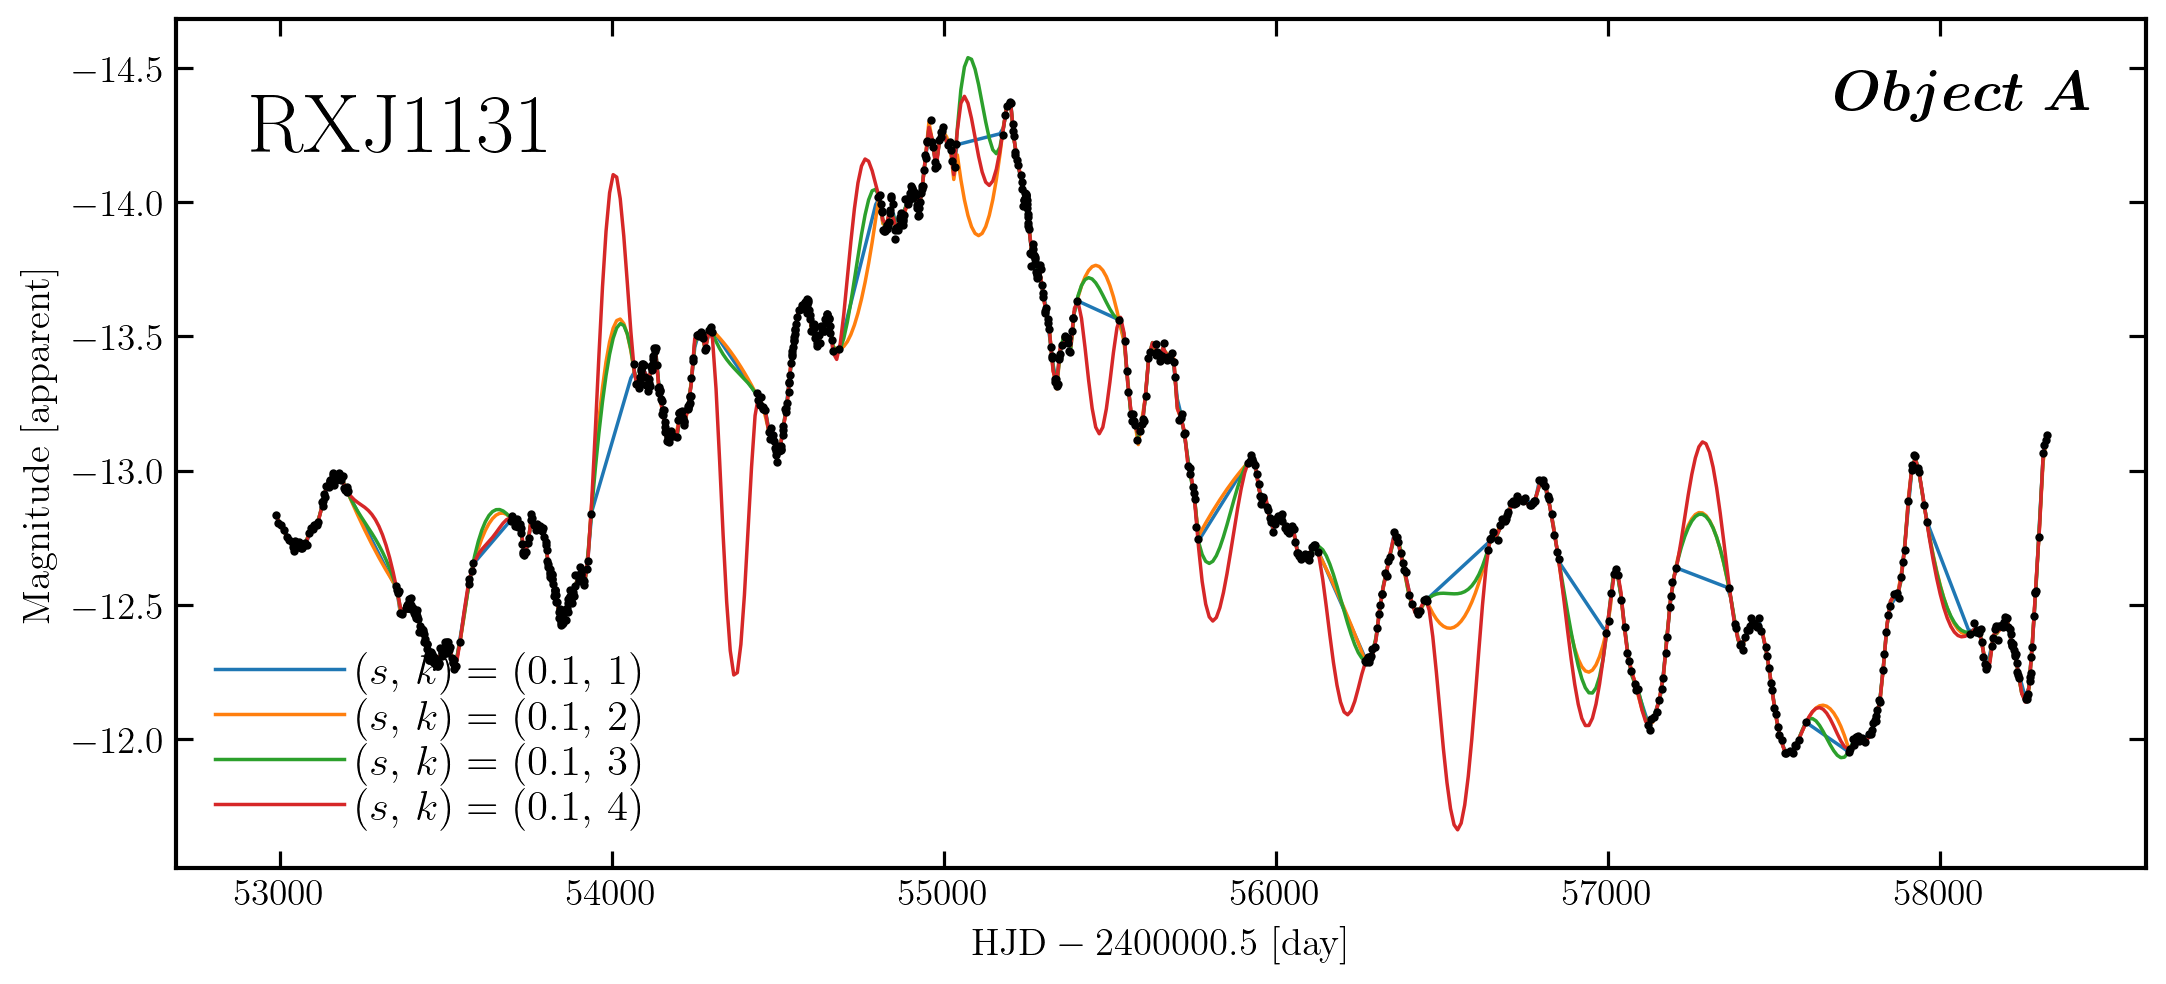

In [10]:
app = applied_analysis()
obj = 'A'

# initialize plot
fig, ax = app.plot(obj=obj)

# time array
tarr = app.time_array()

sf = 0.1 # smoothing factor
for k in range(1, 5): # degree of smoothing spline
    uspl = app.UnivariateSpline(s=sf, k=k)
    ax.plot(tarr, uspl[obj](tarr), lw=1.25, label=rf'$(s,\, k) = ({sf},\, {k})$', zorder=0);
ax.legend(frameon=False, loc='lower left', fontsize=15.5, handlelength=3, handletextpad=0.3, labelspacing=0.05);

### Vary smoothing factor for a cubic spline

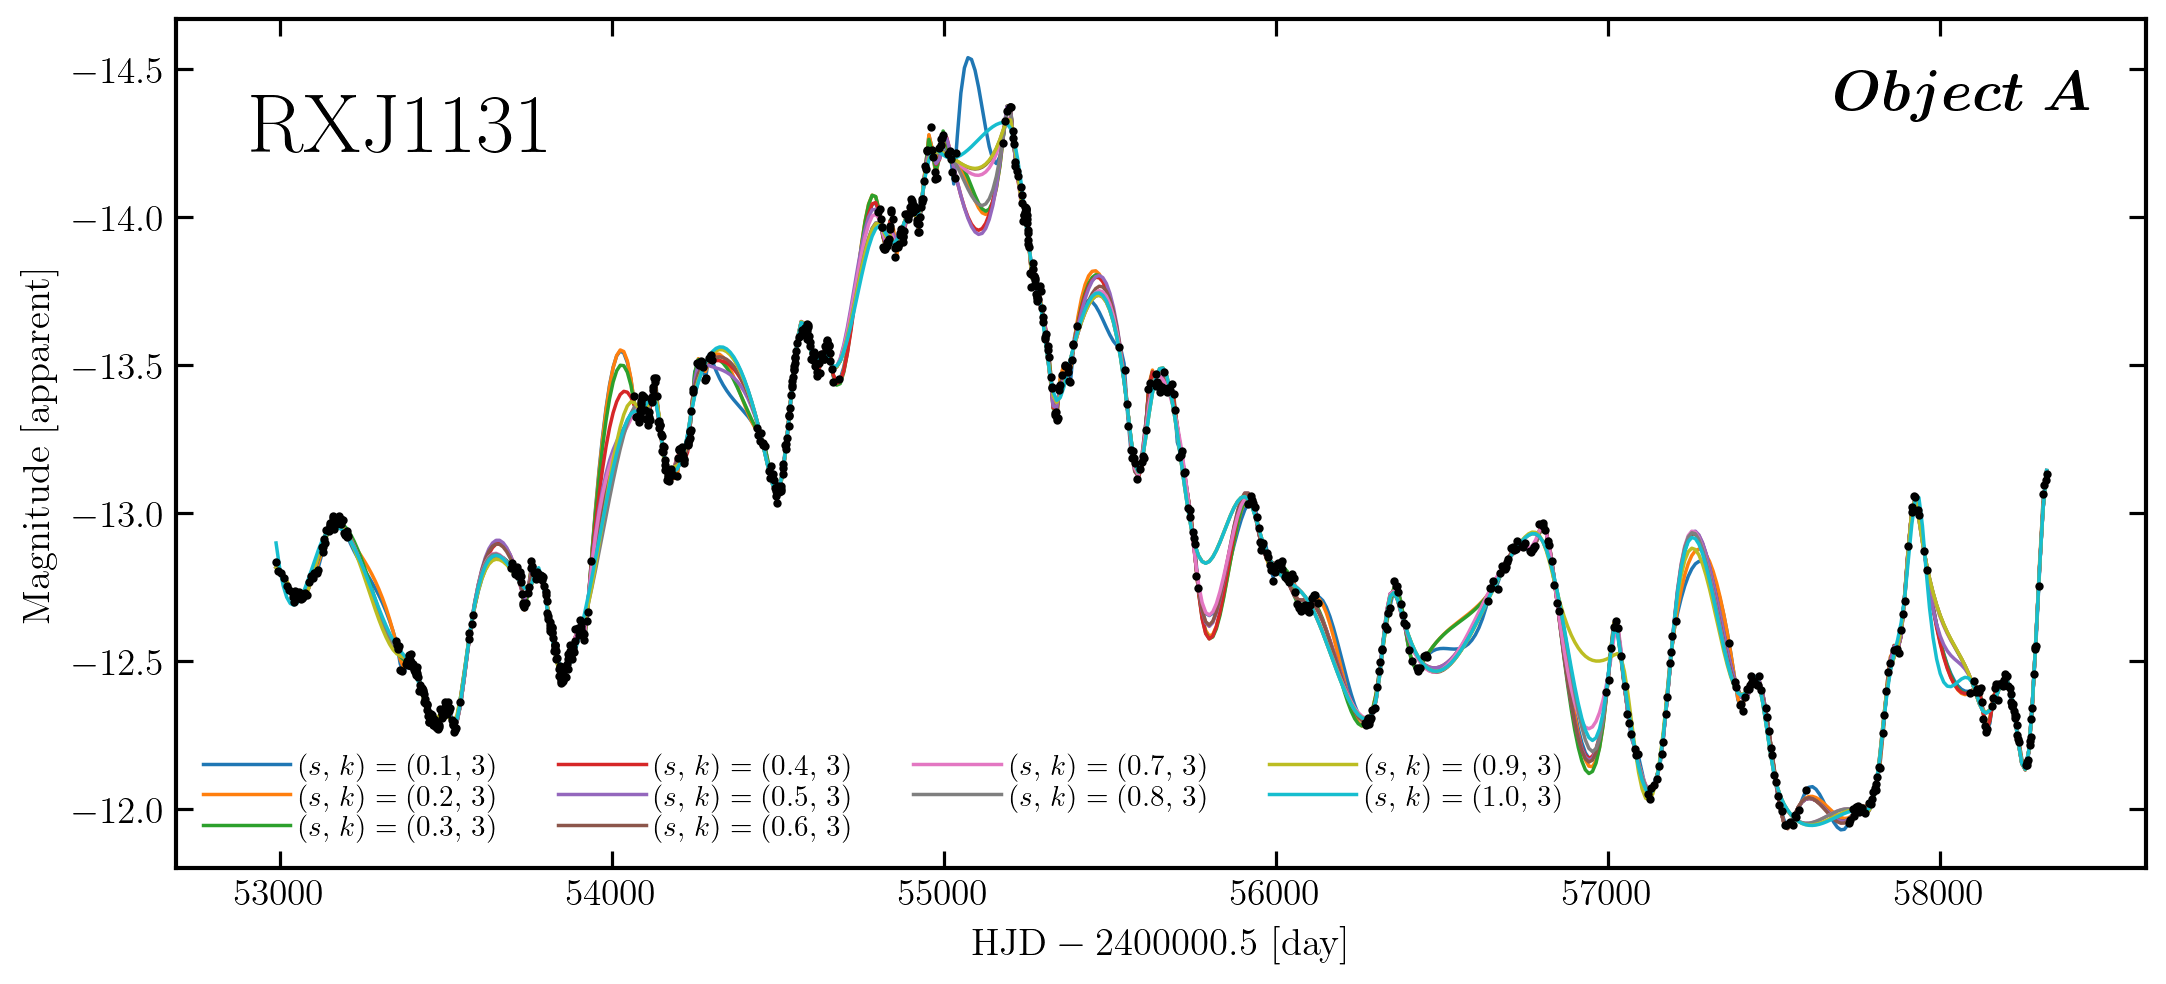

In [11]:
app = applied_analysis()
obj = 'A'

# initialize plot
fig, ax = app.plot(obj=obj);

# time array
tarr = app.time_array()

k = 3 # cubic spline
for sf in np.linspace(0.1, 1.0, 10): # degree of smoothing spline
    uspl = app.UnivariateSpline(s=sf, k=k)
    ax.plot(tarr, uspl[obj](tarr), lw=1.25, label=rf'$(s,\, k) = ({sf:0.1f},\, {k})$', zorder=0)
ax.legend(frameon=False, loc='lower left', ncol=4, fontsize=10.5, handlelength=3, handletextpad=0.3, labelspacing=0.05);